<a href="https://colab.research.google.com/github/GitShamil/ML_homeworks/blob/main/IAD_6_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data 


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [1]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [5]:
train.isna().sum()

id             0
keyword       44
location    1760
text           0
target         0
dtype: int64

In [6]:
train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [7]:
train = train.fillna('')
test = test.fillna('')

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


<Axes: >

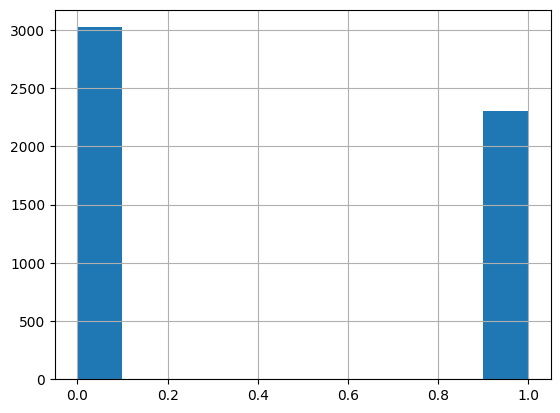

In [8]:
train['target'].hist()

2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [9]:
popular_keywords = train['keyword'].value_counts().index[1:11].values

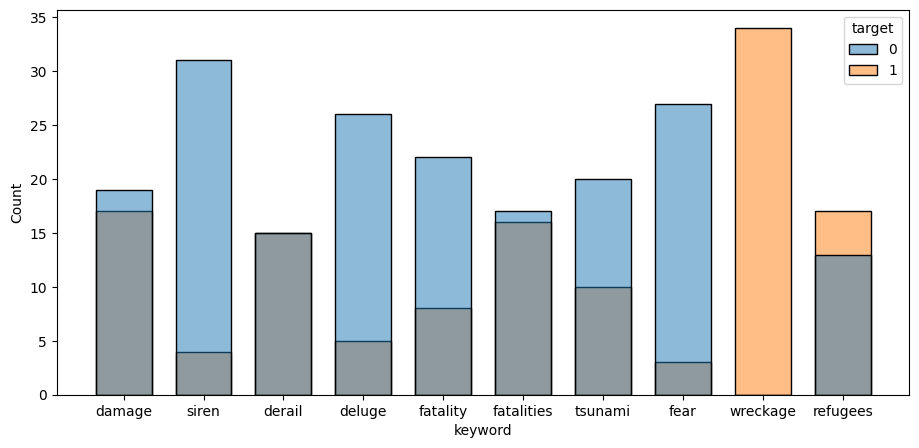

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(11, 5))
sns.histplot(data = train[train['keyword'].isin(popular_keywords)], x = 'keyword', hue='target', ax= ax,shrink=.7)
fig.show()

**Выводы**: TODO

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [11]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [12]:
# -- YOUR CODE HERE --
train_new = train.copy()
train_new['text'] = train['keyword'] +' '+ train['location'] + " "+  train['text']
train_new = train_new.drop(['keyword','location'], axis=1)

test_new = test.copy()
test_new['text'] = test['keyword'] +' '+ test['location'] + " "+  test['text']
test_new = test_new.drop(['keyword','location'], axis=1)

In [13]:
train_new.loc[[6590, 7122, 2769]]

,id,text,target
6590,9436,"survivors Marietta, GA Stemming from my #Cubs ...",1
7122,10203,violent%20storm If you were the NWS wth a rot...,1
2769,3980,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train_new['text'])

print(X.shape)

# -- YOUR CODE HERE --

(5329, 18455)


## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [15]:
import re
import string

def contains_digit(s: str) -> bool:
    # Проверка, содержит ли слово цифры
    # -- YOUR CODE HERE --
    return bool(re.search('\d', s))

def contains_punctuation(s: str) -> bool:
    # Проверка, содержит ли слово пунктуацию
    # -- YOUR CODE HERE --
    for sym in s:
      if sym in string.punctuation:
        return True
    return False

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    # -- YOUR CODE HERE --
    for sym in s:
      if sym == '#':
        return True
    return False

def is_mention(s: str) -> bool:
    # Проверка, является ли слово упоминанием
    # -- YOUR CODE HERE --
    for sym in s:
      if sym == '@':
        return True
    return False

def investigate_vocabulary(vocabulary):
    # -- YOUR CODE HERE --
    with_digit = 0
    with_punctiation = 0
    with_hashtags = 0
    with_mention = 0
    for line in vocabulary:
      if contains_digit(line):
        with_digit += 1
      if contains_punctuation(line):
        with_punctiation += 1
      if is_hashtag(line):
        with_hashtags += 1
      if is_mention(line):
        with_mention += 1
    print(f'With digit: {with_digit}', # -- YOUR CODE HERE --
          )
    print(f'With punctuation: {with_punctiation}', # -- YOUR CODE HERE --
          )
    print(f'Hashtags: {with_hashtags}', # -- YOUR CODE HERE --
          )
    print(f'Mentions:  {with_mention}', # -- YOUR CODE HERE --
          )



In [16]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit: 2
With punctuation: 7
Hashtags: 1
Mentions:  3


In [17]:
investigate_vocabulary(vectorizer.vocabulary_)

With digit: 3812
With punctuation: 315
Hashtags: 0
Mentions:  0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [18]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [19]:
# -- YOUR CODE HERE --
tokenizer = TweetTokenizer()
vectorizer = CountVectorizer(tokenizer = tokenizer.tokenize)
X = vectorizer.fit_transform(train_new['text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [20]:
investigate_vocabulary(vectorizer.vocabulary_
                       )

With digit: 3939
With punctuation: 7338
Hashtags: 1470
Mentions:  1685


**Сравнение:** TODO

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [21]:
s = '2343g'
s[1:]

'343g'

In [22]:
import re
import string
from nltk.tokenize import TweetTokenizer
import nltk

nltk.download('stopwords')


def contains_only_latin_letters(s: str) -> bool:
    # Проверка, содержит ли слово только латинские буквы
    # -- YOUR CODE HERE --
    for sym in s:
      if sym not in string.ascii_letters:
        return False
    return True

def is_emoji(s: str) -> bool:
    # Проверка, является ли слово смайликом
    # -- YOUR CODE HERE --
    for sym in s:
      if (sym in string.punctuation or sym in {'(',')','{','}','[',']'}) == False:
        return False
    return True

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    # -- YOUR CODE HERE --
    return s[0] == '#' and contains_only_latin_letters(s[1:])

def custom_tokenizer(s: str) -> List[str]:    
    # Кастомный токенайзер
    # -- YOUR CODE HERE --
    s = s.lower()
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(s)
    answer = []
    for token in tokens:
      if (token not in nltk.corpus.stopwords.words('english')) and  \
       (contains_only_latin_letters(token) or is_hashtag(token) or is_emoji(token)):
       answer.append(token)
    return answer
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
custom_tokenizer('She LOVES painting :-) #art')

['loves', 'painting', ':-)', '#art']

In [24]:
custom_tokenizer('She LOVES painting :-) #art')

['loves', 'painting', ':-)', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [25]:
# -- YOUR CODE HERE --
i = 0
for text in train_new['text']:
  if i > 10:
    break
  i+=1
  print(custom_tokenizer(text))
  print()

['bridge', '%', 'ashes', ':', 'australia', 'collapse', 'trent', 'bridge', 'among', 'worst', 'history', ':', 'england', 'bundled', 'australia', '...']

['hail', 'carol', 'stream', ',', 'illinois', 'great', 'michigan', 'technique', 'camp', 'thanks', '.', '#goblue', '#wrestleon']

['police', 'houston', 'cnn', ':', 'tennessee', 'movie', 'theater', 'shooting', 'suspect', 'killed', 'police']

['rioting', 'still', 'rioting', 'couple', 'hours', 'left', 'class', '.']

['wounds', 'lake', 'highlands', 'crack', 'path', 'wiped', 'morning', 'beach', 'run', '.', 'surface', 'wounds', 'left', 'elbow', 'right', 'knee', '.']

['airplane', '%', 'somewhere', 'experts', 'france', 'begin', 'examining', 'airplane', 'debris', 'found', 'reunion', 'island', ':', 'french', 'air', 'accident', 'experts', '...', '#mlb']

['bloody', 'isolated', 'city', 'world', 'perth', "'", 'came', 'kill', 'indians', '...', 'fun', "'", ':', 'video', 'smirking', 'remorseless', 'pakistani', 'killer', 'shows', 'boasting', '.']

['burni

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


In [45]:
vectorizer = CountVectorizer(tokenizer = custom_tokenizer)
train_token = vectorizer.fit_transform(train_new['text'])
test_token = vectorizer.transform(test_new['text'])
# -- YOUR CODE HERE --

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


2. Обучите LogisticRegression на полученных признаках.


In [46]:
from sklearn.linear_model import LogisticRegression
# -- YOUR CODE HERE --
regression = LogisticRegression(max_iter=10000).fit(train_token, train_new['target'])
y_train = regression.predict(train_token)
y_test = regression.predict(test_token)

3. Посчитайте метрику f1-score на тестовых данных.

In [48]:
from sklearn.metrics import f1_score

# -- YOUR CODE HERE --
f1_score(y_test, test_new['target'])

0.7470398277717976

## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer = custom_tokenizer)
train_token = vectorizer.fit_transform(train_new['text'])
test_token = vectorizer.transform(test_new['text'])
regression = LogisticRegression(max_iter=10000).fit(train_token, train_new['target'])
y_train = regression.predict(train_token)
y_test = regression.predict(test_token)
f1_score(y_test, test_new['target'])
# 1
# -- YOUR CODE HERE --

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.7343316694398225

In [59]:
test_token.shape

(2284, 12885)

1. **Ответ:** стало на 1% меньше

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [70]:
# 2
vectorizer = TfidfVectorizer(tokenizer = custom_tokenizer, max_df=0.3)
train_token = vectorizer.fit_transform(train_new['text'])
test_token = vectorizer.transform(test_new['text'])
regression = LogisticRegression(max_iter=10000).fit(train_token, train_new['target'])
y_train = regression.predict(train_token)
y_test = regression.predict(test_token)
score = f1_score(y_test, test_new['target'])
# -- YOUR CODE HERE --

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [71]:
print(score)
print(test_token.shape[1])

0.7313019390581716
12884




```
```

2. **Ответ:** При 0.9 размер не поменялся. При 0.3 стал меньше на 1. Но качество упало

3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [74]:
# 3
vectorizer = TfidfVectorizer(tokenizer = custom_tokenizer, max_df=0.9, min_df=0.0003)
train_token = vectorizer.fit_transform(train_new['text'])
test_token = vectorizer.transform(test_new['text'])
regression = LogisticRegression(max_iter=10000).fit(train_token, train_new['target'])
y_train = regression.predict(train_token)
y_test = regression.predict(test_token)
score = f1_score(y_test, test_new['target'])
# -- YOUR CODE HERE --

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [75]:
print(score)
print(test_token.shape[1])

0.7346260387811635
5301


3. **Ответ:** Уменьшил матрицу в 2 раза, и качество чуть чуть выросло

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [100]:
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer(tokenizer = custom_tokenizer, n_features = 5000)
train_token = vectorizer.fit_transform(train_new['text'])
test_token = vectorizer.transform(test_new['text'])
regression = LogisticRegression(max_iter=10000).fit(train_token, train_new['target'])
y_train = regression.predict(train_token)
y_test = regression.predict(test_token)
score = f1_score(y_test, test_new['target'])
# -- YOUR CODE HERE --
print(f'F1 score: {score}')

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


F1 score: 0.6975169300225733


2. Какой из подходов показал самый высокий результат?

подход с min_df

2. **Ответ:** TODO

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [165]:
from sklearn.neural_network import MLPClassifier
tokenizer = TweetTokenizer()
vectorizer = CountVectorizer(tokenizer = tokenizer.tokenize)
train_token = vectorizer.fit_transform(train_new['text'])
test_token = vectorizer.transform(test_new['text'])
clf = MLPClassifier(solver='adam', max_iter=10000, hidden_layer_sizes=(5,5,5,5,5), random_state=1)
clf.fit(train_token, train_new['target'])
y_test = clf.predict(test_token)
score = f1_score(y_test, test_new['target'])
# -- YOUR CODE HERE --
print(f'F1 score: {score}')

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


F1 score: 0.7166504381694256
